### Connect To Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Download Dataset From Kaggle To Google Drive

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /root/.kaggle/


[Errno 2] No such file or directory: '/root/.kaggle/'
/content


In [ ]:
!cp '/content/drive/MyDrive/Kaggle Token/kaggle.json' /root/.kaggle/


cp: cannot create regular file '/root/.kaggle/': Not a directory


In [ ]:
!mkdir /content/drive/MyDrive/dataset

mkdir: cannot create directory ‘/content/drive/MyDrive/dataset’: File exists


In [ ]:
!kaggle datasets download -d semiemptyglass/cyclist-dataset\
                          -p /content/drive/MyDrive/dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip /content/drive/MyDrive/dataset/cyclist-dataset.zip\
 -d /content/drive/MyDrive/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008674.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008675.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008676.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008677.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008678.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008679.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008680.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008681.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008682.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008683.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008684.txt  
  inflating: /content/drive/MyDrive/dataset/data_tsinghua/labels/008685.txt  
  inflating: 

In [ ]:
!rm /content/drive/MyDrive/dataset/cyclist-dataset.zip

### Import Important Packages

In [ ]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image  # for displaying images
import shutil
from PIL import Image, ImageDraw
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
random.seed(244)

### Used Functions

In [ ]:
def plot_bounding_box(image, annotation_list):
    bbox = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_bbox = np.copy(bbox)
    transformed_bbox[:,[1,3]] = bbox[:,[1,3]] * w
    transformed_bbox[:,[2,4]] = bbox[:,[2,4]] * h 
    
    transformed_bbox[:,1] = transformed_bbox[:,1] - (transformed_bbox[:,3] / 2)
    transformed_bbox[:,2] = transformed_bbox[:,2] - (transformed_bbox[:,4] / 2)
    transformed_bbox[:,3] = transformed_bbox[:,1] + transformed_bbox[:,3]
    transformed_bbox[:,4] = transformed_bbox[:,2] + transformed_bbox[:,4]
    
    for ann in transformed_bbox:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.axis('off')
    plt.show()

### Split Data To Train And Test

In [ ]:
data_dir = '/content/drive/MyDrive/dataset/data_tsinghua'
images = os.listdir(os.path.join(data_dir, 'images'))
data_size = len(images)
data_size

13674

In [ ]:
random.shuffle(images)
images

['002641.jpg',
 '012834.jpg',
 '005957.jpg',
 '009494.jpg',
 '009794.jpg',
 '013372.jpg',
 '012126.jpg',
 '002717.jpg',
 '011681.jpg',
 '004505.jpg',
 '001819.jpg',
 '009151.jpg',
 '001892.jpg',
 '009025.jpg',
 '013122.jpg',
 '001595.jpg',
 '002545.jpg',
 '012538.jpg',
 '010723.jpg',
 '006120.jpg',
 '004985.jpg',
 '013094.jpg',
 '013314.jpg',
 '009221.jpg',
 '002868.jpg',
 '010232.jpg',
 '000719.jpg',
 '001223.jpg',
 '011263.jpg',
 '007360.jpg',
 '007601.jpg',
 '011572.jpg',
 '002890.jpg',
 '011760.jpg',
 '005291.jpg',
 '011809.jpg',
 '009020.jpg',
 '003752.jpg',
 '006442.jpg',
 '004114.jpg',
 '009485.jpg',
 '008375.jpg',
 '006708.jpg',
 '000236.jpg',
 '002452.jpg',
 '000468.jpg',
 '004616.jpg',
 '000562.jpg',
 '013377.jpg',
 '007082.jpg',
 '007387.jpg',
 '011818.jpg',
 '012680.jpg',
 '012623.jpg',
 '001540.jpg',
 '007268.jpg',
 '000160.jpg',
 '004136.jpg',
 '004148.jpg',
 '006692.jpg',
 '013272.jpg',
 '005110.jpg',
 '008122.jpg',
 '004837.jpg',
 '003884.jpg',
 '001491.jpg',
 '012093.j

In [ ]:
train_images = images[:int(0.7*data_size)]
val_images = images[int(0.7*data_size):int(0.8*data_size)]
test_images = images[int(0.8*data_size): ]
(len(train_images), len(val_images), len(test_images))

(9571, 1368, 2735)

In [ ]:
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/train_data
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/train_data/images
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/train_data/labels
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/val_data
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/val_data/images
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/val_data/labels
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/test_data
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/test_data/images
!mkdir /content/drive/MyDrive/dataset/data_tsinghua/test_data/labels

In [ ]:
train_dir = os.path.join(data_dir, 'train_data')
val_dir = os.path.join(data_dir, 'val_data')
test_dir = os.path.join(data_dir, 'test_data')

In [ ]:
for image in train_images:
  shutil.copy(os.path.join(data_dir, 'images', image),
              os.path.join(train_dir, 'images', image))
  shutil.copy(os.path.join(data_dir, 'labels', image.replace('jpg', 'txt')),
              os.path.join(train_dir, 'labels', image.replace('jpg', 'txt')))

(len(os.listdir(os.path.join(data_dir, 'train_data/images'))),
 len(os.listdir(os.path.join(data_dir, 'train_data/labels'))))

(9571, 9571)

In [ ]:
for image in val_images:
  shutil.copy(os.path.join(data_dir, 'images', image),
              os.path.join(val_dir, 'images', image))
  shutil.copy(os.path.join(data_dir, 'labels', image.replace('jpg', 'txt')),
              os.path.join(val_dir, 'labels', image.replace('jpg', 'txt')))

(len(os.listdir(os.path.join(data_dir, 'val_data/images'))),
 len(os.listdir(os.path.join(data_dir, 'val_data/labels'))))

(1368, 1368)

In [ ]:
for image in test_images:
  shutil.copy(os.path.join(data_dir, 'images', image),
              os.path.join(test_dir, 'images', image))
  shutil.copy(os.path.join(data_dir, 'labels', image.replace('jpg', 'txt')),
              os.path.join(test_dir, 'labels', image.replace('jpg', 'txt')))

(len(os.listdir(os.path.join(data_dir, 'test_data/images'))),
 len(os.listdir(os.path.join(data_dir, 'test_data/labels'))))

(2735, 2735)

### Display Random Train Sample

In [ ]:
train_images_path = [os.path.join(train_dir, 'images', x) \
                     for x in os.listdir(os.path.join(train_dir, 'images'))\
                     if x[-3:] == "jpg"]
                     
#Make Your labels Dictionary
class_name_to_id_mapping = {"Cyclists": 0}
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(),
                                    class_name_to_id_mapping.keys()))

/content/drive/MyDrive/dataset/data_tsinghua/train_data/images/002774.jpg


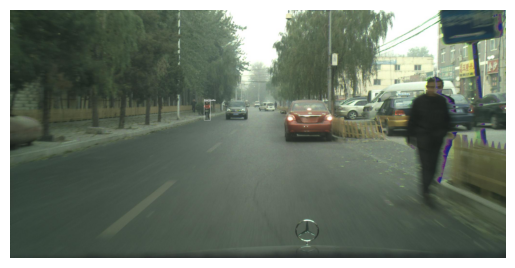

In [ ]:
# Get any random image 
random_image = random.choice(train_images_path)
#Get the corresponding label file
image_labels = random_image.replace("images", "labels").replace("jpg", "txt")

with open(image_labels, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

print(random_image)
assert os.path.exists(random_image)

#Load the image
image = Image.open(random_image)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

### Create Data Config File

In [ ]:
with open('/content/drive/MyDrive/dataset/data_tsinghua/data.yaml', 'w') as file:
  file.write(f'train: {train_dir}\n')
  file.write(f'val: {val_dir}\n')
  file.write(f'test: {test_dir}\n\n')
  file.write(f'nc: {len(class_name_to_id_mapping)}\n\n')
  file.write(f'names: {list(class_name_to_id_mapping.keys())}')


### You Can Get Hyperparameter Config File [From Here](https://drive.google.com/file/d/1MDAPviFWqckVvy-7-dIcRr21VE2hzDny/view?usp=sharing)


### You Can Get Custom Network Architecture [From Here](https://drive.google.com/file/d/1MFihy96ktuCwHIY_BPIL6N9GWFcinnKS/view?usp=sharing)

### Download And Put Them In Your Dataset 